# Evaluate the system

Overview:

1. We have a list of recipes and an generated list of tools known as "system output"
2. Human annotaters agree on a list of tools known as "answer key"
3. For the two lists, compare the results
4. For each recipe, we have a precision, recall, f-1 score

In [30]:
import pandas as pd

In [31]:
#open file
def open_file(filename):
    output = {}
    new_recipe = 1
    number = -1
    tools = []

    with open (filename) as f:
        lines = f.readlines()
        print(lines[-1])
        for line in lines:
            
            if line in ['\n','\r\n']:
                output[number] = tools
                new_recipe = 1
                tools = []
                
            elif line in ['0000']:
                output[number] = tools
                break
                
            elif new_recipe == 1:
                stuff = line.split('\t')
                #print(stuff)
                number = stuff[0]
                title = stuff[1]
                new_recipe = 0

            else:
                tools.append(line.strip())
        
    return output

In [32]:
# parse lists from txt file
# assume the txt is this format: first line: # and title of recipe, then each tool on each line, then empty line
outputs = open_file('sys_output.txt')
answers = open_file('answer_keys.txt')           

0000
0000


In [33]:
#outputs

In [34]:
#answers

In [35]:
num_of_recipes = len(outputs)

# analysis
* precision = correct / length (system output)
* recall = correct / length (answer key)
* F-measure = 2 / (1/precision + 1/recall)

In [36]:
analysis = pd.DataFrame(columns = ["number","precision", "recall", "f-measure"])

In [37]:
for key in outputs:
    num = key
    print(num)
    output = outputs[num]
    answer = answers[num]
    correct = 0
    length_output = len(output)
    length_answer = len(answer)
    
    for i in output:
        for j in answer:
            if j.find(i) != -1:
                correct += 1
                continue
    
        
    precision = correct/length_output
    recall = correct/length_answer
    f_measure = 2 / (1/precision + 1/recall)
    
    analysis = analysis.append({'number': num, "precision":precision, "recall":recall, "f-measure":f_measure}, ignore_index = True)

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


In [38]:
analysis

,number,precision,recall,f-measure
0,51,0.666667,0.500000,0.571429
1,52,1.000000,0.666667,0.800000
2,53,0.500000,0.250000,0.333333
3,54,1.000000,1.000000,1.000000
4,55,0.500000,0.500000,0.500000
5,56,1.000000,1.000000,1.000000
6,57,1.000000,0.500000,0.666667
7,58,0.333333,0.666667,0.444444
8,59,1.000000,0.666667,0.800000
9,60,0.500000,1.000000,0.666667


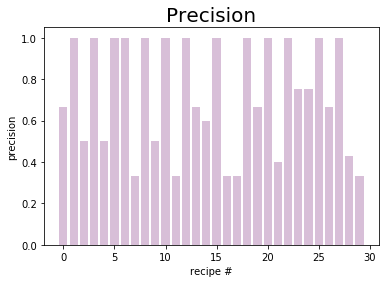

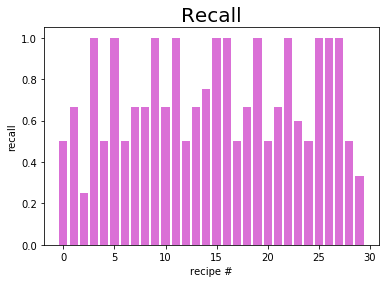

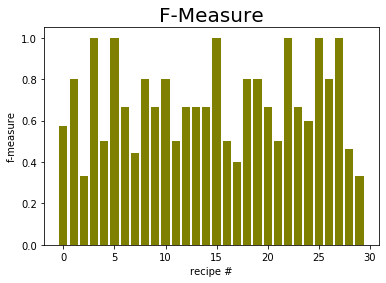

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = [int(i)-50 for i in analysis["number"]]
p = analysis["precision"]
r = analysis["recall"]
f = analysis['f-measure']

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()
rects1 = ax1.bar(x, p, width, label='precision',color='thistle')
rects2 = ax2.bar(x, r, width, label='recall',color='orchid')
rects3 = ax3.bar(x, f, width, label='f-measure',color='olive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('precision')
ax1.set_xlabel('recipe #')
ax1.set_title('Precision',fontsize = 20)

ax2.set_ylabel('recall')
ax2.set_xlabel('recipe #')
ax2.set_title('Recall',fontsize = 20)

ax3.set_ylabel('f-measure')
ax3.set_xlabel('recipe #')
ax3.set_title('F-Measure',fontsize = 20)


plt.show()


In [40]:
pd.DataFrame.mean(analysis)

number       1.717512e+58
precision    7.253968e-01
recall       7.200000e-01
f-measure    6.870248e-01
dtype: float64